In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
# 요금 이상치/결측값 제거 후 통계치 비교해보기

<AxesSubplot:ylabel='fare'>

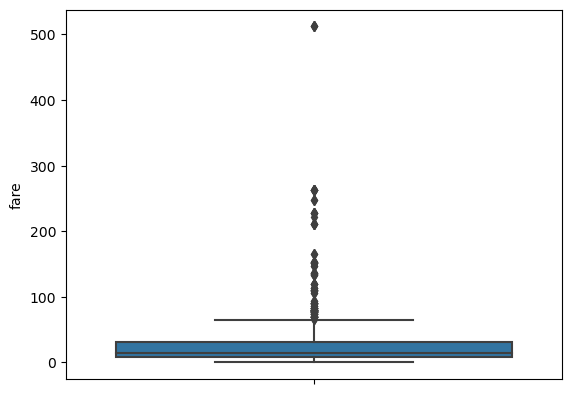

In [7]:
# 요금 이상치/결측값 제거 전 분포 확인
sns.boxplot(data = titanic, y = 'fare')

In [9]:
p25 = titanic['fare'].quantile(0.25) # 1사분위수 값 구하기
p75 = titanic['fare'].quantile(0.75) # 3사분위수 값 구하기

In [10]:
# IQR 구하기 : 3사분위수 값 - 1사분위수 값
iqr = p75 - p25
iqr

23.0896

In [11]:
# 이상치 출력
np.where((titanic['fare'] < -26.724) | (titanic['fare'] > 65.6344))

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
        258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
        311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
        375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
        496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
        585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
        689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
        779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
       dtype=int64),)

In [12]:
# 이상치 값 모두 결측값(NA)으로 대체
titanic['fare'] = np.where((titanic['fare'] < -26.724) | (titanic['fare'] > 65.6344), np.nan, titanic['fare'])

In [16]:
#  확인
titanic['fare'].isna().sum()

116

In [18]:
# 결측값 제거한 데이터 새로 저장
titanic_1 = titanic.dropna()
titanic_1['fare'].isna().sum()

0

<AxesSubplot:ylabel='fare'>

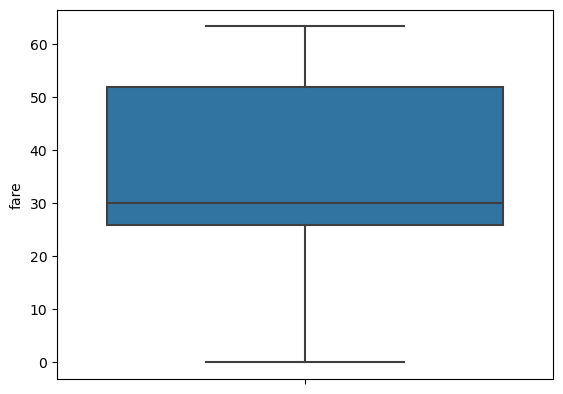

In [19]:
# 이상치/결측값 제거 후 분포 확인
sns.boxplot(data = titanic_1, y = 'fare')

In [20]:
# 제거 전 평균
titanic.fare.mean() 

17.822090709677408

In [21]:
 # 제거 후 평균
titanic_1.fare.mean()

32.780887628865976

In [22]:
# 제거 전 중간값
titanic.fare.median()

13.0

In [23]:
# 제거 후 중간값
titanic_1.fare.median()

30.0